In [1]:
#Two-Period Crusonia Model
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Friday's Uility Function; The Objective Function
def u(c1, c2):
    return math.log(c1) + ß*math.log(c2) 
#The Crusonia Plant's Budget Constraint; The Constraint
def c(c1, c2):
    return c1 + c2/π


#Parameters:
ß = 0.97
π = 1.05
c0 = 100

In [3]:
#System of Equations for the Optimal Bundle:
#I derived these equations from the revelent Euler-Lagrange equations.
A = np.array([[1+ß,0], [0,(1+ß)/(ß*π)]])
B = np.array([c0,c0])
C = np.linalg.solve(A, B)

#Optimal Choice in Periods 1 and 2:
c1 = C[0]
c2 = C[1]


#Printing the Results: 
print('Initial Mass of the Crusonia Plant:', c(c1, c2)) #This line makes sure that my results are consistent. 
print("Friday makes the best use of his Crusonia plant when he consumes", c1, "units of Crusonia today and", c2, "units of Crusonia tomorrow.")
print("Friday's Total Utility:", u(c1, c2))

Initial Mass of the Crusonia Plant: 100.0
Friday makes the best use of his Crusonia plant when he consumes 50.76142131979695 units of Crusonia today and 51.7005076142132 units of Crusonia tomorrow.
Friday's Total Utility: 7.754240215163424


In [4]:
#Computing Friday's income


income = c0/(1+1/π)
print("Friday's income:",income)
print("The product of Friday's discount factor and his Crusonia plant's productivity:",ß*π)
print("The ratio of Friday's consumption tomorrow to his consumption today:", c2/c1)


if income > c1:
    print("Friday saves.")

if income < c1:
    print("Friday dissaves.")


if income == c1:
    print("Friday consumes his income.")


print("The ratio of Friday's income to his consumption today:", income/c1)
print("The ratio of Friday's income to his consumption tomorrow:", income/c2) #Not quite because I don't have his income tomorrow!

Friday's income: 51.21951219512195
The product of Friday's discount factor and his Crusonia plant's productivity: 1.0185
The ratio of Friday's consumption tomorrow to his consumption today: 1.0185000000000002
Friday saves.
The ratio of Friday's income to his consumption today: 1.0090243902439024
The ratio of Friday's income to his consumption tomorrow: 0.9906965049031933


  Period       Consumption
Period 1 50.76142131979695
Period 2  51.7005076142132


findfont: Font family ['MS Reference Specialty'] not found. Falling back to DejaVu Sans.
findfont: Font family ['MS Reference Sans Serif'] not found. Falling back to DejaVu Sans.


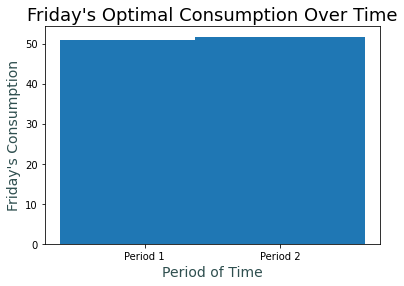

In [5]:
#Graph of Friday's Consumption Across Time:
x = np.array(["Period 1", "Period 2"])
y = np.array([c1, c2])

twoperioddf = pd.DataFrame(data=np.column_stack((x,y)),columns=['Period',"Consumption"])
print(twoperioddf.to_string(index=False))

plt.bar(x,y, width=1.25)

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}

plt.xlabel("Period of Time",  fontdict = font1)
plt.ylabel("Friday's Consumption",  fontdict = font1)
plt.title("Friday's Optimal Consumption Over Time", fontdict = font2)
plt.show()

<ipython-input-18-0aa6bf4020f0>:28: RuntimeWarning: divide by zero encountered in log
  F = np.log(X) + ß*np.log(Y) - u(c1, c2)  #Implicit equation for the indifference curve


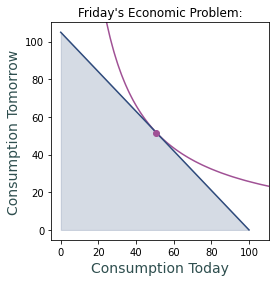

In [18]:
#Plotting the Budget Constraint and the Indifference Curve of the Optimal Level of Utility:

#Plotting the  Crusonia Plant's Budget Constraint:
def B(c1):
    return π*(c0 - c1) #I define Friday's consumption tomorrow as a function of his consumption today


def plot_constraint(ax, c0, π):
    c1_bc = np.array([0, c0])
    c2 = B(c1_bc)
    ax.plot(c1_bc, c2, color='#2f4b7c')
    ax.fill_between(c1_bc, 0, c2, color='#2f4b7c', alpha=0.2)
    ax.set_xlabel("Consumption Today", fontdict = font1)
    ax.set_ylabel("Consumption Tomorrow", fontdict = font1)
    return ax

fig, ax = plt.subplots()
plot_constraint(ax, c0, 1/π)

plt.axis('square')
plt.title("Friday's Economic Problem:", size=12, fontdict = font2)
plt.plot(c1, c2, 'o', color='#a05195')


xlist = np.linspace(0, c0+100, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(0, c0+100, 100) 
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
F = np.log(X) + ß*np.log(Y) - u(c1, c2)  #Implicit equation for the indifference curve
plt.contour(X, Y, F, [0], colors = '#a05195', linestyles = 'solid')

plt.show()
